## Importing important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

## Loading the dataset

In [3]:
df = pd.read_csv("C:/Users/USER/Downloads/Finance_Ecommerce_Dirty_Dataset_csv.csv")
print(df.head())

  TransactionID        Date AccountID   AccountName TransactionType  Amount  \
0      TX103251    4/3/2025    AC3973  Arjun Sharma           Debit   47.36   
1      TX101874   10/8/2024    AC8970     Dev Kumar           Debit  159.55   
2      TX103746   9/14/2024    AC3777    Amit Gupta           Debit    2.43   
3      TX105269  12/21/2024    AC9635      Ritu Roy          Refund   78.96   
4      TX100463   4/14/2024    AC1329      Raj Bose          Refund   42.81   

  Currency  ExchangeRate      Balance   Merchant  ...  Subcategory    Country  \
0     USD        80.6864  -1714968.59   ShopEasy  ...        Books         UK   
1      inr        1.0000  -1162428.75   AutoZone  ...      Concert  Australia   
2      GBP      102.0148  -2085783.34  BigBasket  ...    Specialty        USA   
3      AED       18.1216  -2727243.49   ShopEasy  ...   Restaurant  Australia   
4      USD       78.4379   -259175.06  LocalMart  ...     FastFood        USA   

       City PostalCode           CardN

####  Project Overview: Finance E-Commerce Fraud Detection Analysis
This project focuses on analyzing e-commerce financial transactions to detect fraud patterns, assess risk exposure,
and generate actionable insights for decision-making. The dataset contains 6,055 transactions with detailed information
about customers, merchants,transaction types, amounts, and locations.
#### Project Columns Overview
- **TransactionID**: Unique identifier for each transaction.
- **Date**: Date when the transaction occurred.
- **AccountID**: Unique identifier for the customer account.
- **AccountName**: Name of the customer.
- **TransactionType**: Type of transaction (e.g., Purchase, Refund, Transfer).
- **Amount**: Transaction amount in the currency used.
- **Currency**: Currency code of the transaction (e.g., USD, EUR).
- **ExchangeRate**: Exchange rate applied for the transaction if currency conversion occurred.
- **Balance**: Account balance after the transaction.
- **Merchant**: Name of the merchant involved in the transaction.
- **MerchantPhone**: Contact phone number of the merchant.
- **MerchantEmail**: Email address of the merchant.
- **Category**: Main category of the transaction (e.g., Electronics, Travel).
- **Subcategory**: More specific category of the transaction.
- **Country**: Country where the transaction occurred.
- **City**: City where the transaction occurred.
- **PostalCode**: Postal code of the transaction location.
- **CardNumber**: Masked card number used for the transaction.
- **Email**: Customer email address.
- **Phone**: Customer phone number.
- **IsFraud**: Original fraud label (Yes/No) for the transaction.
- **Notes**: Additional notes or comments about the transaction.
- **IsFraudFlag**: Binary fraud indicator created for analysis (0 = Not Fraud, 1 = Fraud).


## Preview of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    6057 non-null   object 
 1   Date             6060 non-null   object 
 2   AccountID        6059 non-null   object 
 3   AccountName      6059 non-null   object 
 4   TransactionType  6058 non-null   object 
 5   Amount           6059 non-null   object 
 6   Currency         6055 non-null   object 
 7   ExchangeRate     6058 non-null   float64
 8   Balance          5988 non-null   object 
 9   Merchant         6058 non-null   object 
 10  MerchantPhone    4647 non-null   float64
 11  MerchantEmail    4222 non-null   object 
 12  Category         6058 non-null   object 
 13  Subcategory      6055 non-null   object 
 14  Country          6058 non-null   object 
 15  City             6058 non-null   object 
 16  PostalCode       5742 non-null   float64
 17  CardNumber    

In [5]:
df.head()

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
0,TX103251,4/3/2025,AC3973,Arjun Sharma,Debit,47.36,USD,80.6864,-1714968.59,ShopEasy,...,Books,UK,Pune,153621.0,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,-4.469492e+09,No,repeat purchase,16/09/2018
1,TX101874,10/8/2024,AC8970,Dev Kumar,Debit,159.55,inr,1.0000,-1162428.75,AutoZone,...,Concert,Australia,Delhi,380312.0,XXXX-XXXX-5979,dev.kumar@yahoo.com,5.882006e+09,No,cashback credited,11/7/2022
2,TX103746,9/14/2024,AC3777,Amit Gupta,Debit,2.43,GBP,102.0148,-2085783.34,BigBasket,...,Specialty,USA,Gurugram,NaN,XXXX-XXXX-2243,amit.gupta@example.com,8.832898e+08,No,cashback credited,Aug-21
3,TX105269,12/21/2024,AC9635,Ritu Roy,Refund,78.96,AED,18.1216,-2727243.49,ShopEasy,...,Restaurant,Australia,Mumbai,793747.0,XXXX-XXXX-9279,ritu.roy@hotmail.com,6.845400e+09,No,suspected fraud,2024
4,TX100463,4/14/2024,AC1329,Raj Bose,Refund,42.81,USD,78.4379,-259175.06,LocalMart,...,FastFood,USA,Mumbai,755067.0,NaN,raj.bose@hotmail.com,1.228611e+09,No,cashback credited,3/2/2023


In [6]:
df.tail()

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
6055,TX105699,10/16/2023,AC5214,Vikram Iyer,Credit,69.09,USD,76.4757,"?-2,901,016.18",AutoZone,...,Hotel,UAE,Pune,856227.0,XXXX-XXXX-6489,vikram.iyer@yahoo.com,4.081945e+09,No,chargeback requested,2021
6056,TX102550,7/25/2025,AC8982,Anita Reddy,debit,4.94,USD,79.1632,-1557558.39,ShopEasy,...,Concert,Australia,Bengaluru,235120.0,XXXX-XXXX-5540,anita.reddy@gmail.com,2.586561e+09,No,monthly subscription,5/27/2023
6057,TX100537,9/24/2023,AC5308,Rohit Kumar,Credit,20.87,AED,19.7547,-276412.59,Amazon,...,Pharmacy,UAE,Mumbai,263866.0,XXXX-XXXX-XXXX-6774,rohit.kumar@hotmail.com,NaN,No,NaN,unknown
6058,TX101220,3/25/2024,AC7593,Sana Reddy,Credit,7.96,USD,76.8570,-593859.37,Reliance,...,Men,India,Hyderabad,152222.0,XXXX-XXXX-7745,sana.reddy@yahoo.com,6.866496e+09,No,manual adjustment,Aug-19
6059,TX104271,2/3/2025,AC4810,Neha Reddy,Credit,17.66,INR,1.0000,-2254562.37,ElectroWorld,...,Accessory,UK,Chennai,347582.0,XXXX-XXXX-XXXX-9831,neha.reddy@example.com,1.500553e+09,No,monthly subscription,20/06/2020


In [7]:
df.isnull().sum()

TransactionID         3
Date                  0
AccountID             1
AccountName           1
TransactionType       2
Amount                1
Currency              5
ExchangeRate          2
Balance              72
Merchant              2
MerchantPhone      1413
MerchantEmail      1838
Category              2
Subcategory           5
Country               2
City                  2
PostalCode          318
CardNumber          439
Email               259
Phone               328
IsFraud              76
Notes               804
CustomerSince         2
dtype: int64

There are some Null values in the dataset

In [8]:
df.duplicated().sum()

np.int64(1)

There is one duplicate value in the dataset

In [9]:
df.shape

(6060, 23)

## Cleaning the Data 


In [10]:
#converting date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [11]:
df['Date'].apply(type).value_counts()


Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    6060
Name: count, dtype: int64

In [12]:
# This removes anything that is not number from the amount column
df['Amount'] = df['Amount'].replace(r'[^\d\.-]', '', regex=True).astype(float)


In [13]:
# This removes anything that is not number from the Balance column
df['Balance'] = df['Balance'].replace(r'[^\d\.-]', '', regex=True).astype(float)


In [14]:
# convert to strings
cols_to_str = ['MerchantPhone', 'Phone', 'CardNumber', 'PostalCode']

for i in cols_to_str:
    df[i] = df[i].astype("string")


In [15]:
#  droping rows where critical columns are missing
df = df.dropna(subset=['TransactionID', 'AccountID', 'AccountName', 'Amount'])


In [16]:
# fill missing values with unkonwn
cat_cols = ['Merchant', 'Category', 'Subcategory', 'Country', 'City', 'TransactionType','MerchantPhone','MerchantEmail','PostalCode',
            'CardNumber','Email','Phone']

for column in cat_cols:
    df[column] = df[column].fillna("Unknown")


In [17]:
# fill note column with " "
df['Notes'] = df['Notes'].fillna("")



In [18]:
df = df.drop_duplicates()

In [19]:
# fill currency column with mode value
df['Currency'] = df['Currency'].fillna(df['Currency'].mode()[0])


In [20]:
#fill exchange reat column with midian value
df['ExchangeRate'] = df['ExchangeRate'].fillna(df['ExchangeRate'].median())


In [21]:
# Fill missing balances with forward fill
df['Balance'] = df['Balance'].fillna(method='ffill')  


In [22]:
# Create a new column 'IsFraudFlag' 
df['IsFraud'] = df['IsFraud'].map({'Yes': 1, 'No': 0})

# Fill missing values with 0 (assuming missing = not fraud)
df['IsFraud'] = df['IsFraud'].fillna(0)


In [23]:
# drop customer since column

df = df.drop(columns=['CustomerSince'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6055 entries, 0 to 6059
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    6055 non-null   object        
 1   Date             6055 non-null   datetime64[ns]
 2   AccountID        6055 non-null   object        
 3   AccountName      6055 non-null   object        
 4   TransactionType  6055 non-null   object        
 5   Amount           6055 non-null   float64       
 6   Currency         6055 non-null   object        
 7   ExchangeRate     6055 non-null   float64       
 8   Balance          6055 non-null   float64       
 9   Merchant         6055 non-null   object        
 10  MerchantPhone    6055 non-null   string        
 11  MerchantEmail    6055 non-null   object        
 12  Category         6055 non-null   object        
 13  Subcategory      6055 non-null   object        
 14  Country          6055 non-null   object      

From the info we can understand that the dataset is clean and we can go ahead with Analysis and Visualization


## Analysis and Visualization


In [25]:
df.describe(include=[np.number])


,Amount,ExchangeRate,Balance,IsFraud
count,6055.000000,6055.000000,6.055000e+03,6055.000000
mean,1069.117229,46.350448,-1.628709e+06,0.002973
std,13157.307238,40.251935,8.719778e+05,0.054446
min,-598.250000,1.000000,-2.936329e+06,0.000000
25%,13.370000,1.000000,-2.463090e+06,0.000000
50%,32.360000,72.104200,-1.641997e+06,0.000000
75%,74.745000,80.276450,-9.873241e+05,0.000000
max,659580.000000,109.968400,9.969950e+03,1.000000


## What is the fraud rate?

In [26]:
fraud_rate = df['IsFraud'].mean() * 100
print(f"Fraud rate: {fraud_rate:.2%}")

Fraud rate: 29.73%


### The fraud rate is 29.73%


## How do fraud amounts compare with non-fraud?

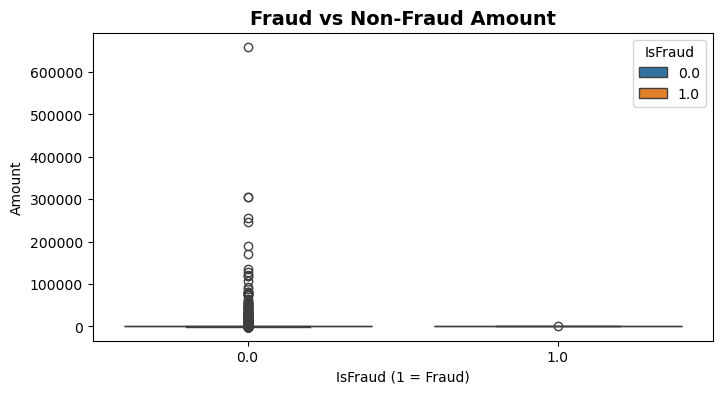

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(x="IsFraud", y="Amount", data=df,hue= "IsFraud")
plt.title("Fraud vs Non-Fraud Amount", fontsize=14, fontweight="bold")
plt.xlabel("IsFraud (1 = Fraud)")
plt.show()


## Which categories show more fraud patterns?

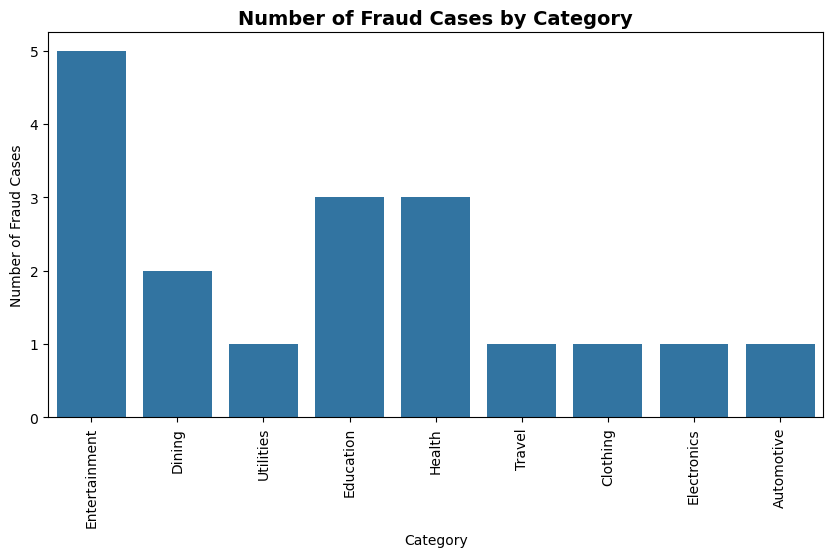

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df[df['IsFraud'] == 1])
plt.title("Number of Fraud Cases by Category", fontsize=14, fontweight='bold')
plt.xlabel("Category")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=90)
plt.show()


## Which merchants show the highest fraud activity?

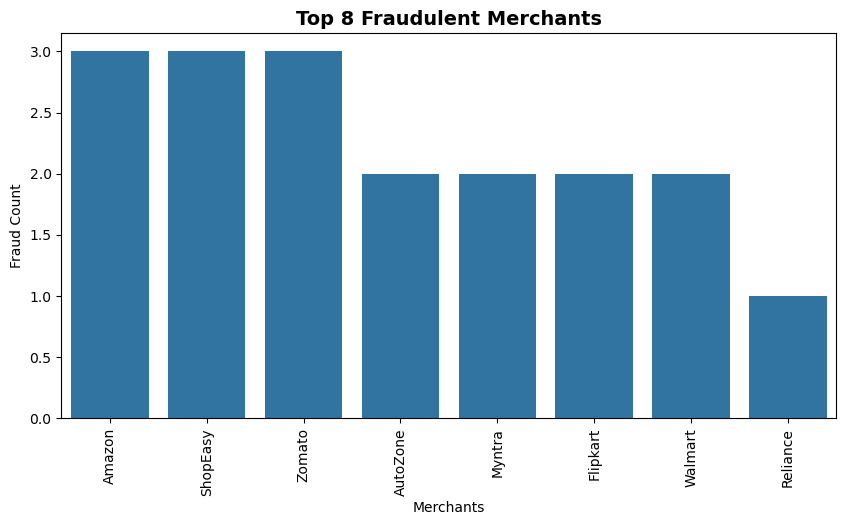

In [29]:
fraud_merchant = (
    df[df['IsFraud'] == 1]
    .groupby("Merchant")["TransactionID"].count()
    .sort_values(ascending=False))

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_merchant.index,y=fraud_merchant.values)
plt.title("Top 8 Fraudulent Merchants", fontsize=14, fontweight="bold")
plt.xlabel("Merchants")
plt.ylabel("Fraud Count")
plt.xticks(rotation=90)
plt.show()


## Are some countries more prone to fraud?

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df.IsFraud==1], x="Country", order=df[df.IsFraud==1]["Country"].value_counts().index)
plt.title("Fraud Cases by Country", fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.show()


## How are the numerical variables related to each other?

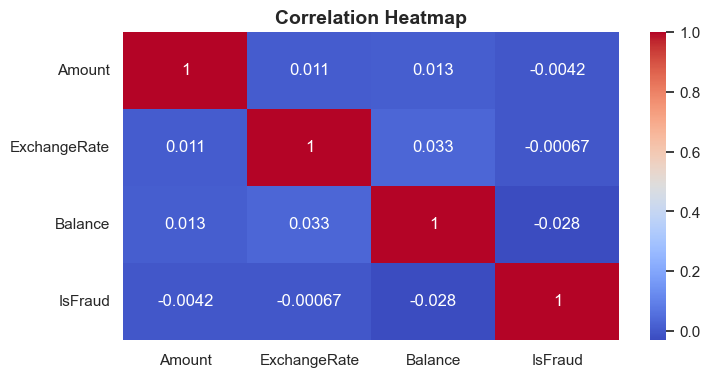

In [54]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap",fontsize=14, fontweight="bold")
plt.show()


## Do unusual balance behavior patterns indicate fraud?

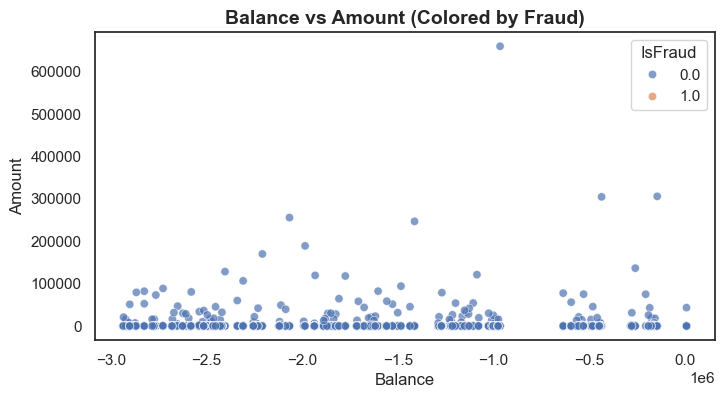

In [53]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="Balance", y="Amount", hue="IsFraud", alpha=0.7)
plt.title("Balance vs Amount (Colored by Fraud)", fontsize=14, fontweight="bold")
plt.show()


## On which days of the week do fraud cases occur most frequently?

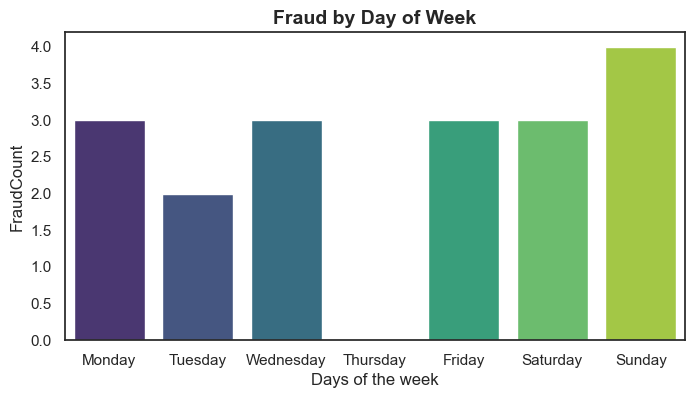

In [58]:
dow_fraud = df.groupby(df['Date'].dt.day_name())['IsFraud'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index(name='FraudCount')
plt.figure(figsize=(8,4))
sns.barplot(x='Date', y='FraudCount', data=dow_fraud, palette='viridis')
plt.xlabel("Days of the week")
plt.title("Fraud by Day of Week",fontsize=14, fontweight="bold")
plt.show()